<a href="https://colab.research.google.com/github/farhanwew/Digital-Image-processing/blob/main/Edge%20Detection%20Based%20on%20Discontinuity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Segmentasi Citra Berbasis Diskontinuitas: Deteksi Titik, Garis, dan Filter**

---

### 1. Konsep Segmentasi Berbasis Diskontinuitas
Segmentasi berbasis diskontinuitas bertujuan untuk menemukan perubahan mendadak (diskontinuitas) pada intensitas piksel dalam citra. Perubahan ini mengindikasikan keberadaan fitur penting seperti tepi, garis, atau titik. Tujuan utama dari metode ini adalah menemukan batas antar objek berdasarkan perubahan intensitas.

Metode yang umum digunakan:

Deteksi titik (Point Detection)

Deteksi garis (Line Detection)

Deteksi tepi (Edge Detection)

---

### 2. Deteksi Titik (Point Detection)
Deteksi titik digunakan untuk mengidentifikasi piksel yang sangat berbeda dari tetangganya, misalnya sudut tajam atau bintik terang/gelap. Deteksi titik menggunakan operator mask kecil (biasanya 3x3) untuk menemukan area dengan perubahan intensitas tajam ke segala arah.

#### Kernel Deteksi Titik:
```
K = [[-1, -1, -1],
     [-1,  8, -1],
     [-1, -1, -1]]
```

#### Implementasi Python:
```python
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
output = cv2.filter2D(img, -1, kernel)
plt.imshow(output, cmap='gray')
plt.title('Deteksi Titik')
plt.axis('off')
plt.show()
```

---

### 3. Deteksi Garis (Line Detection)
Deteksi garis bertujuan untuk mendeteksi fitur linear horizontal, vertikal, atau diagonal.

#### Kernel Contoh:
- Horizontal:
```
[[-1, -1, -1],
 [ 2,  2,  2],
 [-1, -1, -1]]
```
- Vertikal:
```
[[-1, 2, -1],
 [-1, 2, -1],
 [-1, 2, -1]]
```

#### Implementasi:
```python
kernel = np.array([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]])
output = cv2.filter2D(img, -1, kernel)
plt.imshow(output, cmap='gray')
plt.title('Deteksi Garis Horizontal')
plt.axis('off')
plt.show()
```

---

### 4. Filter Gradient
Deteksi tepi berdasarkan perbedaan intensitas antara piksel bertetangga. Sobel operator merupakan metode umum:

Sobel X: deteksi vertikal

Sobel Y: deteksi horizontal

```python
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
gradient = cv2.magnitude(sobelx, sobely)
plt.imshow(gradient, cmap='gray')
plt.title('Gradient (Sobel)')
plt.axis('off')
plt.show()
```

---

### 5. Filter Laplacian
Menangkap perubahan intensitas pada arah manapun secara isotropik. Laplacian mendeteksi daerah perubahan intensitas dengan menghitung turunan kedua.

```python
laplacian = cv2.Laplacian(img, cv2.CV_64F)
plt.imshow(np.abs(laplacian), cmap='gray')
plt.title('Laplacian Filter')
plt.axis('off')
plt.show()
```

---

### 6. Laplacian of Gaussian (LoG)
LoG menggabungkan Gaussian (smoothing) dengan Laplacian untuk mengurangi noise sebelum pendeteksian tepi dengan Laplacian.

```python
blur = cv2.GaussianBlur(img, (5, 5), 1.4)
log = cv2.Laplacian(blur, cv2.CV_64F)
plt.imshow(np.abs(log), cmap='gray')
plt.title('Laplacian of Gaussian (LoG)')
plt.axis('off')
plt.show()
```

---

### 7. Contoh Perbandingan Visual: Gaussian & Laplacian
```python
# Gaussian saja
gaussian = cv2.GaussianBlur(img, (5,5), 0)

# Laplacian tanpa smoothing
lap_no_blur = cv2.Laplacian(img, cv2.CV_64F)

# Laplacian setelah Gaussian (LoG)
lap_with_blur = cv2.Laplacian(gaussian, cv2.CV_64F)

# Tampilkan hasil
plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(np.abs(lap_no_blur), cmap='gray'), plt.title('Laplacian Tanpa Blur'), plt.axis('off')
plt.subplot(132), plt.imshow(gaussian, cmap='gray'), plt.title('Gaussian Blur'), plt.axis('off')
plt.subplot(133), plt.imshow(np.abs(lap_with_blur), cmap='gray'), plt.title('LoG'), plt.axis('off')
plt.show()
```

---

### Kesimpulan
Pendekatan segmentasi berbasis diskontinuitas efektif dalam mengidentifikasi fitur-fitur penting seperti tepi, titik, dan garis pada citra. Dengan menggunakan filter seperti gradient, laplacian, dan LoG, kita dapat mengekstraksi informasi struktural dari citra untuk digunakan dalam tahap analisis atau pengolahan lebih lanjut.



In [6]:
! wget https://www.wondercide.com/cdn/shop/articles/Upside_down_gray_cat.png

--2025-05-05 05:40:40--  https://www.wondercide.com/cdn/shop/articles/Upside_down_gray_cat.png
Resolving www.wondercide.com (www.wondercide.com)... 23.227.38.74, 2620:127:f00f:e::
Connecting to www.wondercide.com (www.wondercide.com)|23.227.38.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2482506 (2.4M) [image/png]
Saving to: ‘Upside_down_gray_cat.png’

Upside_down_gray_ca 100%[===================>]   2.37M  --.-KB/s    in 0.1s    

2025-05-05 05:40:40 (23.3 MB/s) - ‘Upside_down_gray_cat.png’ saved [2482506/2482506]



In [7]:
image = '/content/Upside_down_gray_cat.png'

# Deteksi Titik (Point Detection)

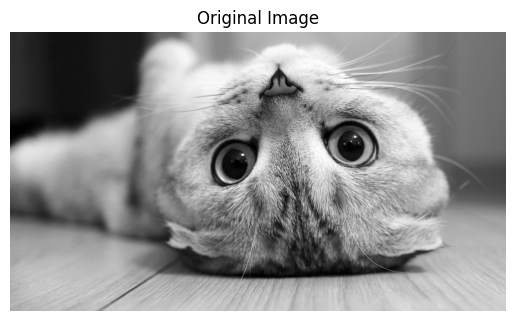

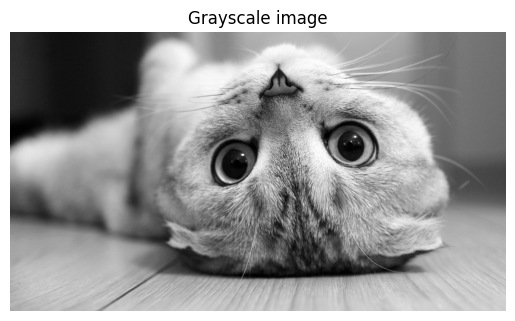

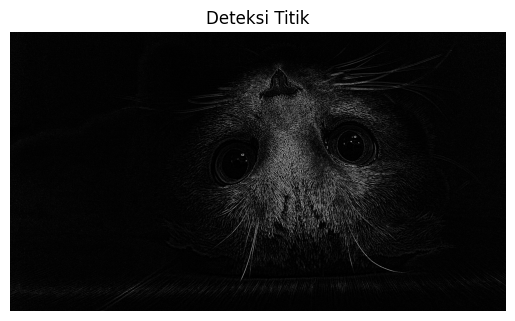

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

# Change 'rgb' to 'gray' to display the grayscale image correctly
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


plt.imshow(img, cmap='gray')
plt.title('Grayscale image')
plt.axis('off')
plt.show()



kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
output = cv2.filter2D(img, -1, kernel)
plt.imshow(output, cmap='gray')
plt.title('Deteksi Titik')
plt.axis('off')
plt.show()

# Deteksi Garis (Line Detection)

In [21]:
! wget https://hips.hearstapps.com/hmg-prod/images/west-virginia-gray-cottage-64dd6bb056057.jpg

--2025-05-05 05:56:59--  https://hips.hearstapps.com/hmg-prod/images/west-virginia-gray-cottage-64dd6bb056057.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2051419 (2.0M) [image/jpeg]
Saving to: ‘west-virginia-gray-cottage-64dd6bb056057.jpg’

west-virginia-gray- 100%[===================>]   1.96M  --.-KB/s    in 0.1s    

2025-05-05 05:56:59 (18.0 MB/s) - ‘west-virginia-gray-cottage-64dd6bb056057.jpg’ saved [2051419/2051419]



In [22]:
image2 = '/content/west-virginia-gray-cottage-64dd6bb056057.jpg'

In [23]:
img2 = cv2.imread(image2, cv2.IMREAD_GRAYSCALE)

In [18]:
import numpy as np


Horizontal = np.array([[-1, -1, -1],
              [ 2,  2,  2],
              [-1, -1, -1]])

Vertikal = np.array([[-1, 2, -1],
            [-1, 2, -1],
            [-1, 2, -1]])

## Vertikal

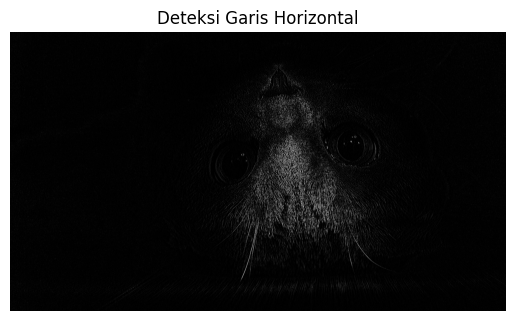

In [19]:
output = cv2.filter2D(img, -1, Vertikal)
plt.imshow(output, cmap='gray')
plt.title('Deteksi Garis Horizontal')
plt.axis('off')
plt.show()

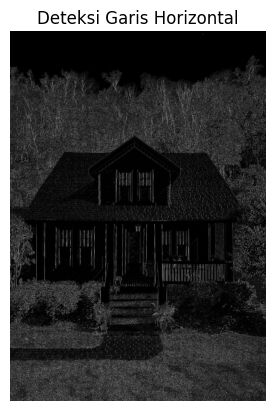

In [24]:
output = cv2.filter2D(img2, -1, Vertikal)
plt.imshow(output, cmap='gray')
plt.title('Deteksi Garis Horizontal')
plt.axis('off')
plt.show()

## Horizontal

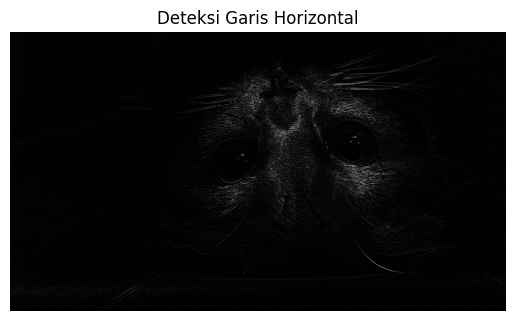

In [20]:
output = cv2.filter2D(img, -1, Horizontal)
plt.imshow(output, cmap='gray')
plt.title('Deteksi Garis Horizontal')
plt.axis('off')
plt.show()

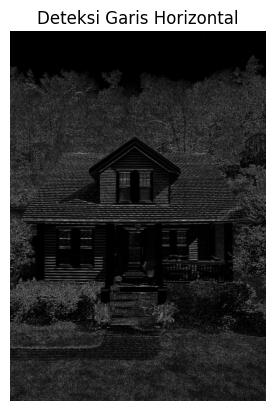

In [25]:
output = cv2.filter2D(img2, -1, Horizontal)
plt.imshow(output, cmap='gray')
plt.title('Deteksi Garis Horizontal')
plt.axis('off')
plt.show()

# Kernel Diagonal

In [26]:
kernel_diagonal_1 = np.array([[0, 1, 0],
                              [0, 0, 0],
                              [0, -1, 0]])
kernel_diagonal_2 = np.array([[-1, 0, 1],
                              [0, 0, 0],
                              [1, 0, -1]])

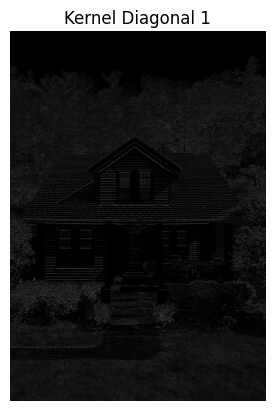

In [28]:
output = cv2.filter2D(img2, -1, kernel_diagonal_1)
plt.imshow(output, cmap='gray')
plt.title('Kernel Diagonal 1')
plt.axis('off')
plt.show()

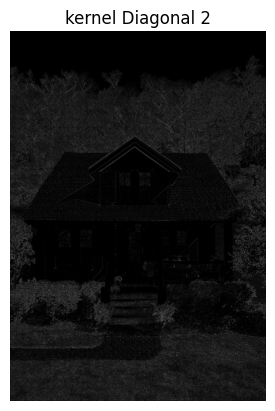

In [29]:
output = cv2.filter2D(img2, -1, kernel_diagonal_2)
plt.imshow(output, cmap='gray')
plt.title('kernel Diagonal 2')
plt.axis('off')
plt.show()

# Gradient filter

## sobel

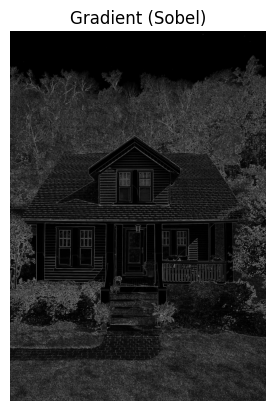

In [30]:
sobelx = cv2.Sobel(img2, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img2, cv2.CV_64F, 0, 1, ksize=3)

gradient = cv2.magnitude(sobelx, sobely)
plt.imshow(gradient, cmap='gray')
plt.title('Gradient (Sobel)')
plt.axis('off')
plt.show()

## prewitt

In [31]:
#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])

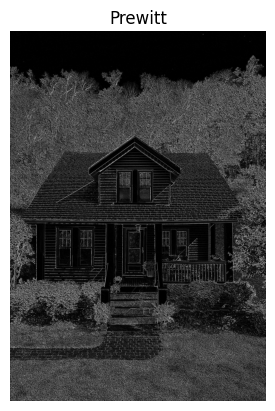

In [35]:
img_prewittx = cv2.filter2D(img2, -1, kernelx)
img_prewitty = cv2.filter2D(img2, -1, kernely)
img_prewitt = img_prewittx + img_prewitty
plt.imshow(img_prewitt, cmap='gray')
plt.title('Prewitt')
plt.axis('off')
plt.show()


## Robert

In [36]:
# Gradient Filter Roberts
robertsx = np.array([[-1,0],
                   [0,1]])
robertsy = np.array([[0,-1],
                   [1,0]])

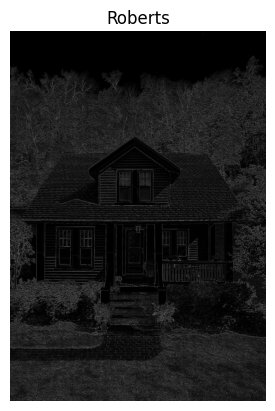

In [39]:
img_robertsx = cv2.filter2D(img2, -1, robertsx)
img_robertsy = cv2.filter2D(img2, -1, robertsy)
img_roberts = img_robertsx + img_robertsy
plt.imshow(img_roberts, cmap='gray')
plt.title('Roberts')
plt.axis('off')
plt.show()

# Filter Laplacian

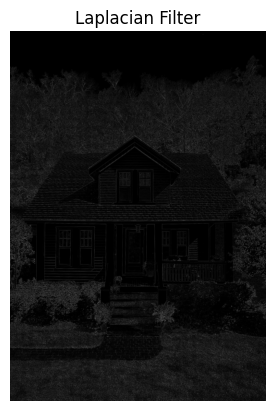

In [40]:
laplacian = cv2.Laplacian(img2, cv2.CV_64F)
plt.imshow(np.abs(laplacian), cmap='gray')
plt.title('Laplacian Filter')
plt.axis('off')
plt.show()

# Laplacian of Gaussian (LoG)


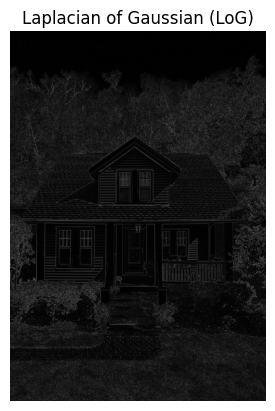

In [41]:
blur = cv2.GaussianBlur(img2, (5, 5), 1.4)
log = cv2.Laplacian(blur, cv2.CV_64F)
plt.imshow(np.abs(log), cmap='gray')
plt.title('Laplacian of Gaussian (LoG)')
plt.axis('off')
plt.show()

# Perbandingan

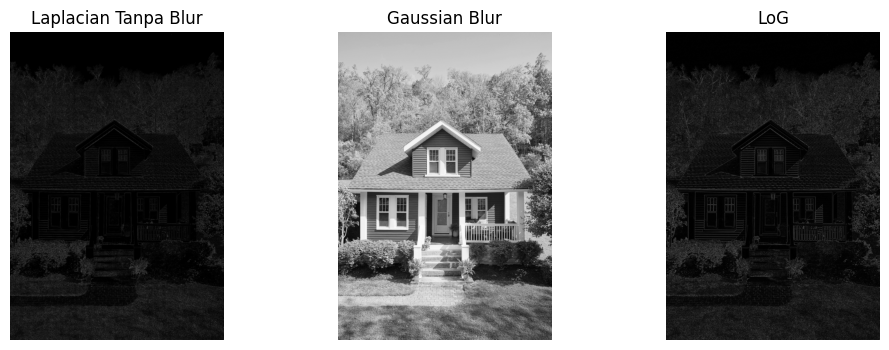

In [42]:
# Gaussian saja
gaussian = cv2.GaussianBlur(img2, (5,5), 0)

# Laplacian tanpa smoothing
lap_no_blur = cv2.Laplacian(img2, cv2.CV_64F)

# Laplacian setelah Gaussian (LoG)
lap_with_blur = cv2.Laplacian(gaussian, cv2.CV_64F)

# Tampilkan hasil
plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(np.abs(lap_no_blur), cmap='gray'), plt.title('Laplacian Tanpa Blur'), plt.axis('off')
plt.subplot(132), plt.imshow(gaussian, cmap='gray'), plt.title('Gaussian Blur'), plt.axis('off')
plt.subplot(133), plt.imshow(np.abs(lap_with_blur), cmap='gray'), plt.title('LoG'), plt.axis('off')
plt.show()